In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
!mkdir -p ~/.kaggle

In [9]:
!cp /content/kaggle.json ~/.kaggle


In [10]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.06G/1.06G [00:04<00:00, 272MB/s]
100% 1.06G/1.06G [00:04<00:00, 245MB/s]


In [11]:
import zipfile
with zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')
    zip_ref.close()

In [12]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [13]:
#preparing image datasets from directories for training and validation purposes

train_ds = keras.utils.image_dataset_from_directory(
    directory= "/content/train",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)
)

valid_ds = keras.utils.image_dataset_from_directory(
    directory= "/content/test",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)
)



Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [14]:
# Data preprocessing: Normalizing pixel values to [0, 1] range
def process(image,lable):
  image = tf.cast(image/255., tf.float32) # Normalize pixel values
  return image, lable

# Applying normalization to training dataset
train_ds = train_ds.map(process)
# Applying normalization to validation dataset
valid_ds = valid_ds.map(process)

In [15]:
# Model architecture is designed for image classification tasks, particularly in distinguishing between cat and dog images. It consists of convolutional layers followed by max pooling for feature extraction,
# batch normalization for stability, and dropout layers for regularization to prevent overfitting. The architecture culminates in a densely connected layer with a sigmoid activation function for binary classification.
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding = 'valid',activation='relu',input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(64,kernel_size=(3,3),padding = 'valid',activation='relu',input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(128,kernel_size=(3,3),padding = 'valid',activation='relu',input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(1,activation="sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [16]:
model.compile(optimizer="adam",
              loss = 'binary_crossentropy',
              metrics= ['accuracy']
              )

In [17]:
history = model.fit(train_ds,epochs=10,validation_data= valid_ds)

Epoch 1/10
625/625 [==============================] - 77s 107ms/step - loss: 1.4084 - accuracy: 0.5699 - val_loss: 0.6436 - val_accuracy: 0.5982
Epoch 2/10
625/625 [==============================] - 66s 105ms/step - loss: 0.6333 - accuracy: 0.6338 - val_loss: 0.6431 - val_accuracy: 0.5628
Epoch 3/10
625/625 [==============================] - 67s 107ms/step - loss: 0.5615 - accuracy: 0.7034 - val_loss: 0.5690 - val_accuracy: 0.7274
Epoch 4/10
625/625 [==============================] - 65s 103ms/step - loss: 0.4913 - accuracy: 0.7517 - val_loss: 0.6127 - val_accuracy: 0.7104
Epoch 5/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4318 - accuracy: 0.7865 - val_loss: 1.1618 - val_accuracy: 0.7096
Epoch 6/10
625/625 [==============================] - 65s 103ms/step - loss: 0.3891 - accuracy: 0.8076 - val_loss: 0.6248 - val_accuracy: 0.7480
Epoch 7/10
625/625 [==============================] - 64s 102ms/step - loss: 0.3328 - accuracy: 0.8371 - val_loss: 0.8916 - val_ac

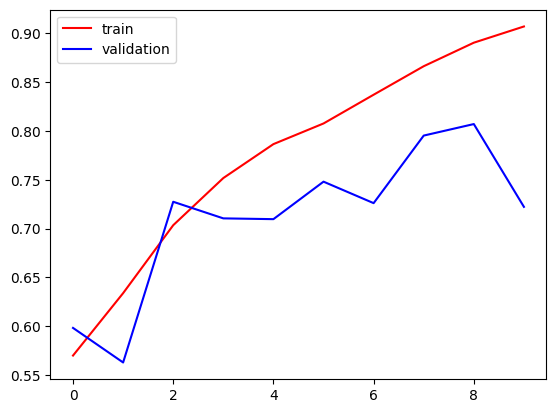

In [18]:
#plots training and validation accuracy to assess model performance
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label ='train')
plt.plot(history.history['val_accuracy'],color='blue',label ='validation')
plt.legend()
plt.show()

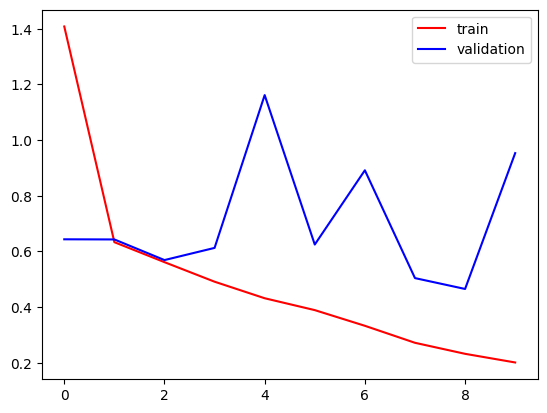

In [19]:
#visualizing training and validation loss curves
plt.plot(history.history['loss'],color='red',label ='train')
plt.plot(history.history['val_loss'],color='blue',label ='validation')
plt.legend()
plt.show()

In [20]:
#pridictsion
import cv2

In [21]:
test_img = cv2.imread('/content/happy-dog-outdoors.jpg')

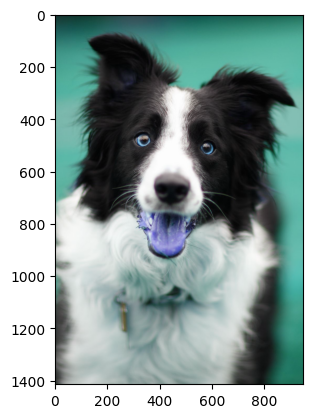

In [22]:
plt.imshow(test_img)

In [23]:
test_img.shape

(1414, 948, 3)

In [24]:
test_img = cv2.resize(test_img,(256,256))

In [25]:
test_input = test_img.reshape((1,256,256,3))

In [26]:
model.predict(test_input)

1/1 [==============================] - 1s 750ms/step


array([[1.]], dtype=float32)

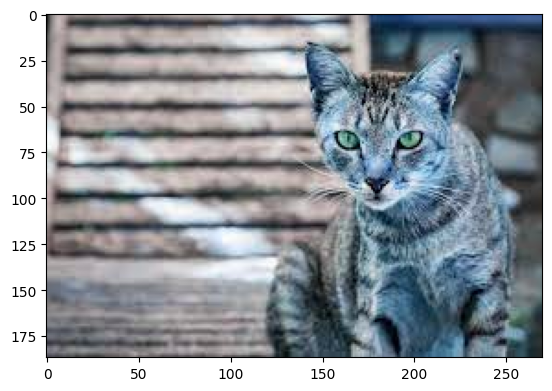

In [27]:
test_img1 = cv2.imread('/content/cat.jpeg')
plt.imshow(test_img1)

In [28]:
test_img1 = cv2.resize(test_img1,(256,256))
test_input = test_img1.reshape((1,256,256,3))

In [29]:
model.predict(test_input)

1/1 [==============================] - 0s 18ms/step


array([[1.]], dtype=float32)